### Import the required libraries

In [ ]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
print(tf.__version__)

from tensorflow.keras import datasets, layers, models
import random
import numpy as np
# Set seed to reproduce results
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

2.7.0


### Download & prepare the CIFAR10 dataset

The CIFAR10 dataset contains 60000 color images in 10 classes, with 6000 images in each class. The dataset is divided into 50000 training images & 10000 testing images.

In [ ]:
# Download the CIFAR10 data
(train_all_images, train_all_labels), (test_images, test_labels) = datasets.cifar10.load_data()
assert train_all_images.shape==(50000, 32, 32, 3)
assert train_all_labels.shape==(50000, 1)
assert test_images.shape==(10000, 32, 32, 3)
assert test_labels.shape==(10000, 1)

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
# Split the train data into train(80%) & validation(20%) set using stratified sampling 
from sklearn.model_selection import train_test_split 

train_images, valid_images, train_labels, valid_labels = train_test_split(train_all_images, train_all_labels, test_size=0.2,
                                                                          stratify=train_all_labels, random_state=42)
# Normalize the pixel values of images to be between 0 & 1 
train_images, valid_images, test_images = train_images/255.0, valid_images/255.0, test_images/255.0


In [ ]:
train_labels

array([[6],
       [7],
       [8],
       ...,
       [1],
       [9],
       [3]], dtype=uint8)

In [ ]:
valid_labels

array([[2],
       [7],
       [1],
       ...,
       [5],
       [9],
       [0]], dtype=uint8)

In [ ]:

test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

### Verify the data

To verify that the looks correct, plot the first 10 images from the training set and display the class name below each image.

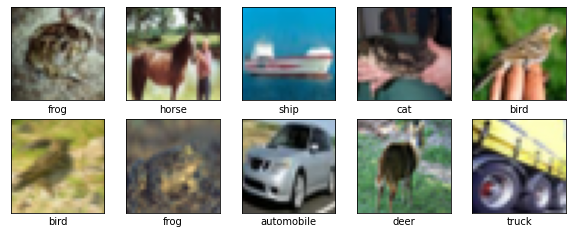

In [ ]:
# Define class_names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create a convolution network

CNN takes input tensors of shape(image_height, image_width, color_channels), ignoring the batch size, where color_channels refers to (R,G,B). The format of CIFAR images is 32*32 pixels, so the input shape is (32,32,3). The output layer has 10 nodes, corresponding to the number of categories of the images. 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
%%time
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(valid_images, valid_labels))

Epoch 1/10
1250/1250 [==============================] - 41s 9ms/step - loss: 1.6913 - accuracy: 0.3755 - val_loss: 1.3370 - val_accuracy: 0.5171
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.3361 - accuracy: 0.5196 - val_loss: 1.2030 - val_accuracy: 0.5661
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1898 - accuracy: 0.5788 - val_loss: 1.2075 - val_accuracy: 0.5793
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0971 - accuracy: 0.6151 - val_loss: 1.0072 - val_accuracy: 0.6456
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0280 - accuracy: 0.6403 - val_loss: 0.9834 - val_accuracy: 0.6570
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9714 - accuracy: 0.6609 - val_loss: 0.9806 - val_accuracy: 0.6593
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9219 - accuracy: 0.6767 - val_loss: 0.9541 - val_ac

**Evaluate the model**

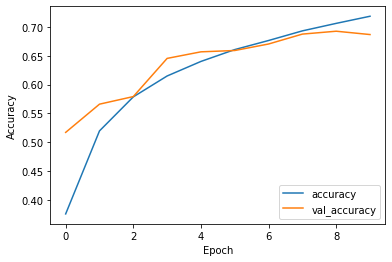

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
valid_loss, valid_acc = model.evaluate(valid_images,  valid_labels, verbose=2)
print(valid_acc)

313/313 - 1s - loss: 0.9072 - accuracy: 0.6870 - 1s/epoch - 3ms/step
0.6869999766349792


In [ ]:
# Get predictions on the test data
y_pred = model.predict(test_images)
y_pred

array([[9.77603137e-04, 2.83318775e-04, 2.12731138e-02, ...,
        3.54471197e-03, 4.16987156e-03, 1.14922249e-03],
       [2.70459857e-02, 7.69306272e-02, 4.04054335e-05, ...,
        9.04769513e-06, 8.72801602e-01, 2.31275298e-02],
       [9.89411920e-02, 7.72837996e-02, 4.12890874e-02, ...,
        2.22516060e-01, 7.00961277e-02, 1.45082295e-01],
       ...,
       [1.81547148e-04, 1.52481306e-07, 2.16234680e-02, ...,
        2.15582121e-02, 6.15340923e-06, 1.67701146e-05],
       [4.16388735e-02, 6.31031156e-01, 7.04908918e-04, ...,
        4.69605089e-04, 3.84154875e-04, 5.83314511e-04],
       [2.68995848e-07, 2.71127027e-11, 2.93313610e-06, ...,
        9.99425769e-01, 1.23546165e-11, 4.45213111e-08]], dtype=float32)

In [ ]:
# Classification report 
from sklearn.metrics import classification_report 
report = classification_report(test_labels, y_pred.argmax(1))
print(report)

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1000
           1       0.89      0.76      0.82      1000
           2       0.68      0.48      0.56      1000
           3       0.47      0.49      0.48      1000
           4       0.59      0.68      0.63      1000
           5       0.53      0.65      0.59      1000
           6       0.74      0.80      0.77      1000
           7       0.71      0.77      0.74      1000
           8       0.84      0.77      0.80      1000
           9       0.77      0.80      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [ ]:
# Save results
import pandas  as pd
df = pd.DataFrame(y_pred, columns=class_names)
df.index+=1
df = df.reset_index(drop=False).rename(columns={'index':'id'})
df.head()

,id,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,1,9.776031e-04,2.833188e-04,0.021273,0.509097,0.002674,0.446851,0.009979,0.003545,4.169872e-03,1.149222e-03
1,2,2.704599e-02,7.693063e-02,0.000040,0.000018,0.000024,0.000002,0.000001,0.000009,8.728016e-01,2.312753e-02
2,3,9.894119e-02,7.728380e-02,0.041289,0.137072,0.059456,0.115170,0.033093,0.222516,7.009613e-02,1.450823e-01
3,4,9.069680e-01,8.248218e-03,0.021034,0.002634,0.043726,0.000327,0.001764,0.000240,1.329807e-02,1.760941e-03
4,5,1.615241e-07,3.984898e-07,0.008053,0.014890,0.075713,0.002983,0.898354,0.000005,3.651556e-07,3.070936e-07


In [ ]:
df.to_csv('submission.csv', index=False)